#Tugas 1 : Linear Regression

## Buat Constructor dan Inisialiasi Model

In [12]:
import numpy as np
import pandas as pd

In [13]:
class LinearRegression:
  def __init__(self,learning_rate=0.01,epoch=100):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.weight = None
    self.bias = None

  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.weight = np.zeros(n_features)
    self.bias = 0
    for i in range(self.epoch):
      for j in range(n_samples):
        y_pred = np.dot(X[j],self.weight) + self.bias
        error = y[j] - y_pred

        self.weight += self.learning_rate * error * X[j]
        self.bias += self.learning_rate * error

  def predict(self,X):
    y_pred = np.dot(X,self.weight) + self.bias
    return y_pred
  
  def expand_feature(self,X,degree):
    X_expand = [X]
    for a in range(2,degree+1):
      X_expand.append(np.power(X,a))
    return np.column_stack(X_expand)

  def calculate_r_square_error(self,y_test, y_pred):
    n_samples = len(y_test)
    residual = y_test - y_pred
    ss_residual = np.sum(residual ** 2)
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    r_square = 1 - (ss_residual / ss_total)
    return r_square

In [39]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target
model = LinearRegression()

model.fit(X,y)

y_pred = model.predict(X)
y.shape

(442,)

### Menggunakan Data baru

In [33]:
X_new = np.linspace(-0.10,0.1,100)
X_new = X_new.reshape(-1,10)
y_new = model.predict(X_new)

In [16]:
data = pd.DataFrame(X_new)
data

,0,1,2,3,4,5,6,7,8,9
0,-0.100000,-0.097980,-0.095960,-0.093939,-0.091919,-0.089899,-0.087879,-0.085859,-0.083838,-0.081818
1,-0.079798,-0.077778,-0.075758,-0.073737,-0.071717,-0.069697,-0.067677,-0.065657,-0.063636,-0.061616
2,-0.059596,-0.057576,-0.055556,-0.053535,-0.051515,-0.049495,-0.047475,-0.045455,-0.043434,-0.041414
3,-0.039394,-0.037374,-0.035354,-0.033333,-0.031313,-0.029293,-0.027273,-0.025253,-0.023232,-0.021212
4,-0.019192,-0.017172,-0.015152,-0.013131,-0.011111,-0.009091,-0.007071,-0.005051,-0.003030,-0.001010
5,0.001010,0.003030,0.005051,0.007071,0.009091,0.011111,0.013131,0.015152,0.017172,0.019192
6,0.021212,0.023232,0.025253,0.027273,0.029293,0.031313,0.033333,0.035354,0.037374,0.039394
7,0.041414,0.043434,0.045455,0.047475,0.049495,0.051515,0.053535,0.055556,0.057576,0.059596
8,0.061616,0.063636,0.065657,0.067677,0.069697,0.071717,0.073737,0.075758,0.077778,0.079798
9,0.081818,0.083838,0.085859,0.087879,0.089899,0.091919,0.093939,0.095960,0.097980,0.100000


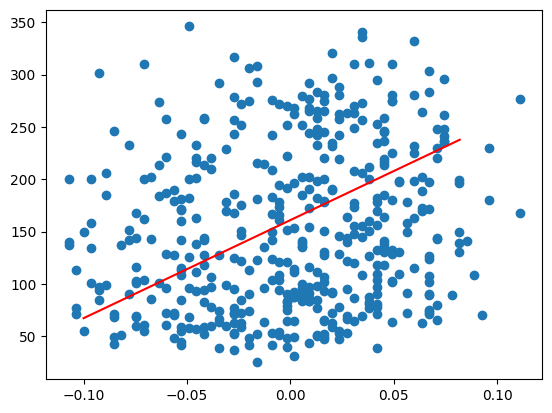

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],y)
plt.plot(X_new[:,0],y_new,color='red')
plt.show()

### Menggunakan Fitur dari Expand Fitur

In [18]:
X_expand = model.expand_feature(X[:,2],2)

model = LinearRegression()

model.fit(X_expand,y)

y_pred = model.predict(X_expand)
# Contoh penggunaan
r_square = model.calculate_r_square_error(y, y_pred)
print("R-Square Error:", r_square)

R-Square Error: 0.2964081804377252


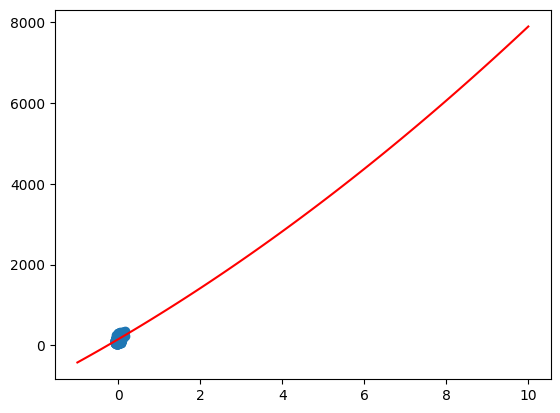

In [21]:
X_new2 = np.linspace(-1,10,100)

X_new2 = model.expand_feature(X_new2,2)
y_new = model.predict(X_new2)
plt.scatter(X[:,2],y)
plt.plot(X_new2[:,0],y_new,'r-')
plt.show()